In [1]:
import warnings
from datetime import datetime
from pathlib import Path

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast
from torch.utils.data import random_split, DataLoader

import ignite
import ignite.distributed as idist
from ignite.contrib.engines import common
from ignite.engine import Engine, Events
from ignite.handlers import Checkpoint, global_step_from_engine
from ignite.metrics import Bleu
from ignite.utils import manual_seed, setup_logger

from datasets import load_dataset
from transformers import ViTConfig, ViTForMaskedImageModeling, ViTModel, ViTFeatureExtractor

from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from dotmap import DotMap as dm

import matplotlib.pyplot as plt

%load_ext autoreload

In [2]:
%matplotlib inline
%autoreload 2

In [3]:
import mnist_training

num_epochs=10
steps_per_epoch=100

stuff = mnist_training.get_training_objects(num_epochs, steps_per_epoch)

/home/maxeonyx/msc/msc-pytorch/env/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/maxeonyx/msc/msc-pytorch/env/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c105ErrorC2ENS_14SourceLocationESs
  warn(f"Failed to load image Python extension: {e}")
Reusing dataset mnist (/home/maxeonyx/.cache/huggingface/datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 37573.50it/s]


In [4]:
from ignite.contrib.handlers import ProgressBar

pbar = ProgressBar()

In [5]:

pbar.attach(stuff.trainer, output_transform=lambda x: {'loss': x})

In [6]:
from IPython.display import display

@stuff.trainer.on(Events.EPOCH_COMPLETED)
def display_image():
    print("Displaying...")
    images = stuff.eval_to_image(stuff.model, stuff.test_dataset)
    fig, ax = plt.subplots(1, len(images))
    for i, img in enumerate(images):
        ax[i].imshow(img)
    plt.show()

[1/100]   1%|1          [00:00<?]

Displaying...


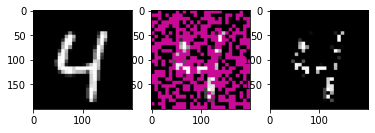

[1/100]   1%|1          [00:00<?]

Displaying...


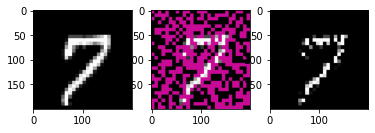

[1/100]   1%|1          [00:00<?]

Displaying...


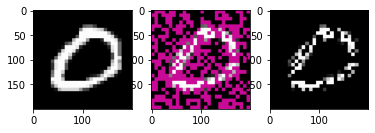

[1/100]   1%|1          [00:00<?]

Displaying...


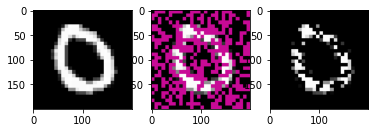

[1/100]   1%|1          [00:00<?]

Displaying...


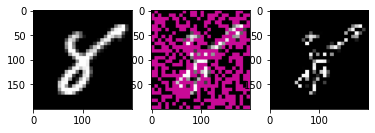

[1/100]   1%|1          [00:00<?]

Displaying...


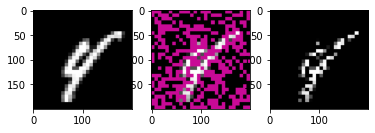

[1/100]   1%|1          [00:00<?]

Displaying...


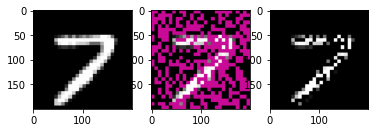

[1/100]   1%|1          [00:00<?]

Displaying...


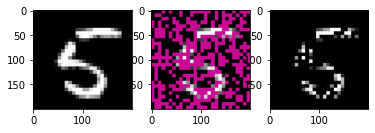

[1/100]   1%|1          [00:00<?]

Displaying...


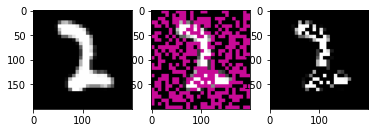

[1/100]   1%|1          [00:00<?]

Displaying...


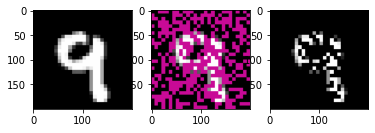

State:
	iteration: 1000
	epoch: 10
	epoch_length: 100
	max_epochs: 10
	output: <class 'torch.Tensor'>
	batch: <class 'dict'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

In [7]:
stuff.trainer.run(stuff.train_dataloader, max_epochs=num_epochs, epoch_length=steps_per_epoch)

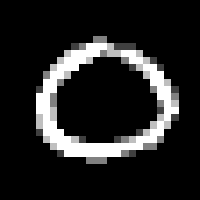

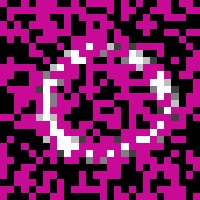

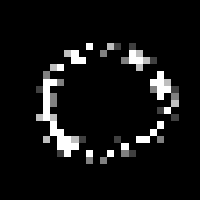

In [8]:
images = stuff.eval_to_image(stuff.model, stuff.test_dataset)
for image in images:
    display(image)